In [84]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sb
from sklearn.cluster import KMeans

In [85]:
#Loading the data
cust_data=pd.read_csv('C:\\Users\\NEHA\\Downloads\\Mall_Customers.csv')


In [86]:
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [88]:
cust_data.shape

(200, 5)

In [89]:
# finding missing values
cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [90]:
# choose Annual Income Column and Spending Score column for clustering

x=cust_data.iloc[:,[3,4]].values

In [91]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [92]:
# Choosing the clusters
# finding wcss value for each cluster

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=52)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

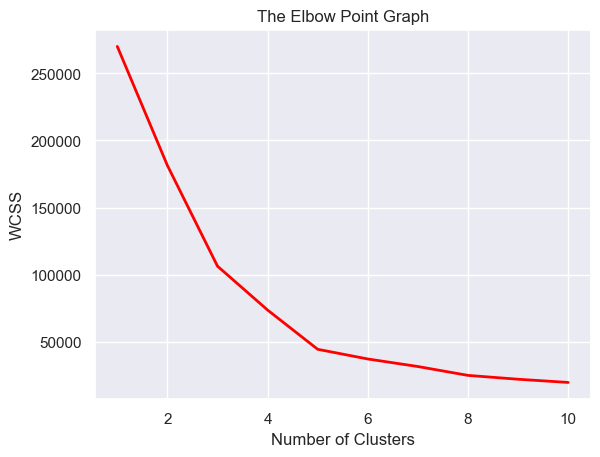

In [93]:
#Plot elbow Point graph

sb.set()
mat.plot(range(1,11), wcss, color="red",linewidth=2)
mat.title('The Elbow Point Graph')
mat.xlabel('Number of Clusters')
mat.ylabel('WCSS')
mat.show()

In [94]:
# Training the k-means clustering model

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y = kmeans.fit_predict(x)

print(Y)

C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


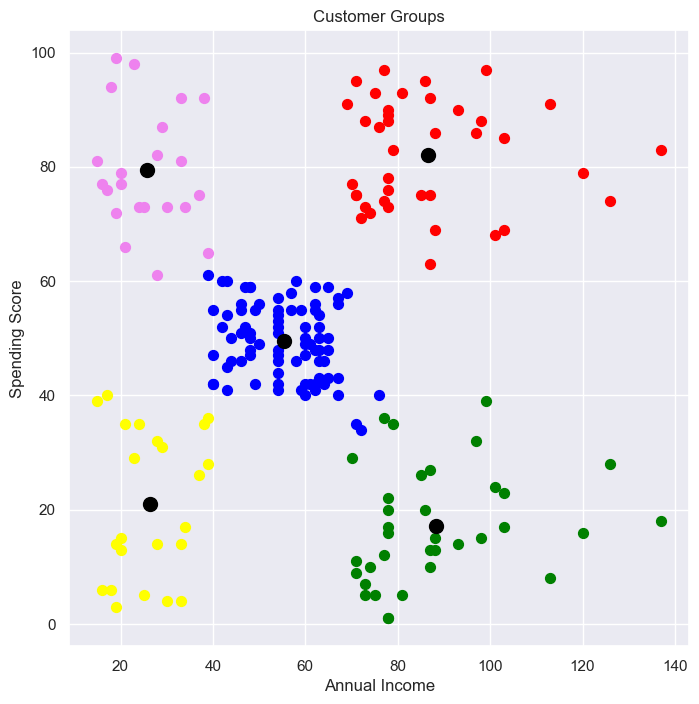

In [95]:
# Visualizing the cluster

mat.figure(figsize=(8,8))
mat.scatter(x[Y==0,0], x[Y==0,1], s=50, c='green', label='Cluster 1')
mat.scatter(x[Y==1,0], x[Y==1,1], s=50, c='blue', label='Cluster 2')
mat.scatter(x[Y==2,0], x[Y==2,1], s=50, c='red', label='Cluster 3')
mat.scatter(x[Y==3,0], x[Y==3,1], s=50, c='violet', label='Cluster 4')
mat.scatter(x[Y==4,0], x[Y==4,1], s=50, c='yellow', label='Cluster 5')

# plot the centroids
mat.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

mat.title('Customer Groups')
mat.xlabel('Annual Income')
mat.ylabel('Spending Score')
mat.show()

In [96]:
# choose age and annual income for clustering 

x1=cust_data.iloc[:,[2,3]].values

In [97]:
print(x1)

[[ 19  15]
 [ 21  15]
 [ 20  16]
 [ 23  16]
 [ 31  17]
 [ 22  17]
 [ 35  18]
 [ 23  18]
 [ 64  19]
 [ 30  19]
 [ 67  19]
 [ 35  19]
 [ 58  20]
 [ 24  20]
 [ 37  20]
 [ 22  20]
 [ 35  21]
 [ 20  21]
 [ 52  23]
 [ 35  23]
 [ 35  24]
 [ 25  24]
 [ 46  25]
 [ 31  25]
 [ 54  28]
 [ 29  28]
 [ 45  28]
 [ 35  28]
 [ 40  29]
 [ 23  29]
 [ 60  30]
 [ 21  30]
 [ 53  33]
 [ 18  33]
 [ 49  33]
 [ 21  33]
 [ 42  34]
 [ 30  34]
 [ 36  37]
 [ 20  37]
 [ 65  38]
 [ 24  38]
 [ 48  39]
 [ 31  39]
 [ 49  39]
 [ 24  39]
 [ 50  40]
 [ 27  40]
 [ 29  40]
 [ 31  40]
 [ 49  42]
 [ 33  42]
 [ 31  43]
 [ 59  43]
 [ 50  43]
 [ 47  43]
 [ 51  44]
 [ 69  44]
 [ 27  46]
 [ 53  46]
 [ 70  46]
 [ 19  46]
 [ 67  47]
 [ 54  47]
 [ 63  48]
 [ 18  48]
 [ 43  48]
 [ 68  48]
 [ 19  48]
 [ 32  48]
 [ 70  49]
 [ 47  49]
 [ 60  50]
 [ 60  50]
 [ 59  54]
 [ 26  54]
 [ 45  54]
 [ 40  54]
 [ 23  54]
 [ 49  54]
 [ 57  54]
 [ 38  54]
 [ 67  54]
 [ 46  54]
 [ 21  54]
 [ 48  54]
 [ 55  57]
 [ 22  57]
 [ 34  58]
 [ 50  58]
 [ 68  59]

In [98]:
# finding wcss value for each cluster

wcss1=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=52)
    kmeans.fit(x1)
    
    wcss1.append(kmeans.inertia_)

C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

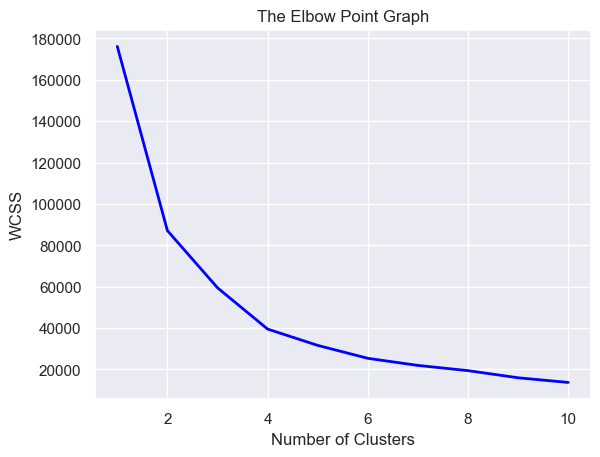

In [99]:
#Plot elbow Point graph
sb.set()
mat.plot(range(1,11), wcss1, color="blue",linewidth=2)
mat.title('The Elbow Point Graph')
mat.xlabel('Number of Clusters')
mat.ylabel('WCSS')
mat.show()

In [100]:
# Training the k-means clustering model

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y1 = kmeans.fit_predict(x1)

print(Y1)

C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1
 1 1 4 3 4 3 4 3 4 3 4 4 4 3 4 4 3 3 3 3 3 4 3 3 4 3 3 3 4 3 3 4 4 3 3 3 3
 3 4 3 4 4 3 3 4 3 3 4 3 3 4 4 3 3 4 3 4 4 4 3 4 3 4 4 3 3 4 3 4 3 3 3 3 3
 4 0 4 4 4 3 3 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


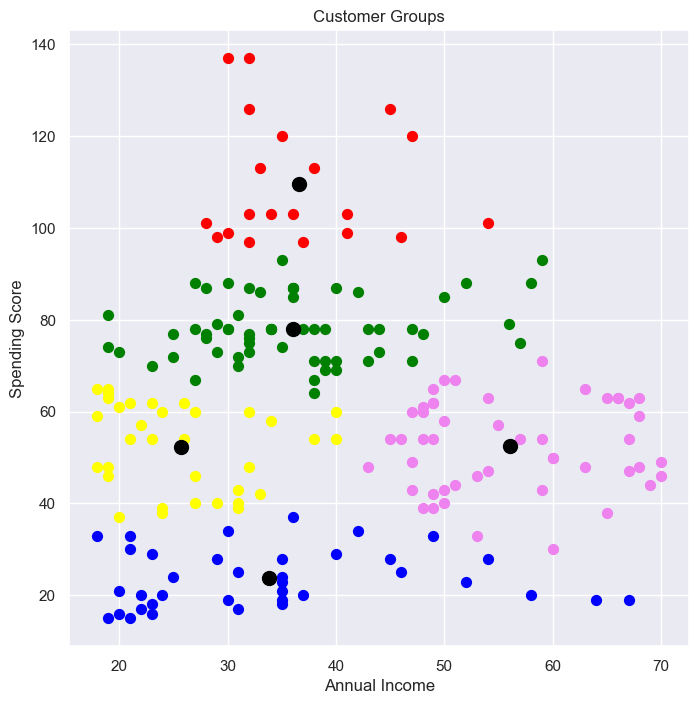

In [101]:
#Visualizing the cLuster

mat.figure(figsize=(8,8))
mat.scatter(x1[Y1==0,0], x1[Y1==0,1], s=50, c='green', label='Cluster 1')
mat.scatter(x1[Y1==1,0], x1[Y1==1,1], s=50, c='blue', label='Cluster 2')
mat.scatter(x1[Y1==2,0], x1[Y1==2,1], s=50, c='red', label='Cluster 3')
mat.scatter(x1[Y1==3,0], x1[Y1==3,1], s=50, c='violet', label='Cluster 4')
mat.scatter(x1[Y1==4,0], x1[Y1==4,1], s=50, c='yellow', label='Cluster 5')

# plot the centroids
mat.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

mat.title('Customer Groups')
mat.xlabel('Annual Income')
mat.ylabel('Spending Score')
mat.show()